In [1]:
import numpy as np
import os
import csv
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
QE_curve = np.loadtxt('QE Curve Data\Kinetix_QE.csv', delimiter = ',')
detector_name = "Kinetix"

In [3]:
QE_function = interpolate.interp1d(QE_curve[:,0],QE_curve[:,1])

In [4]:
fileU = 'QE Curve Data\Generic_Johnson_UBVRIJHKL.U.dat'
fileB = 'QE Curve Data\Generic_Johnson_UBVRIJHKL.B.dat'
fileV = 'QE Curve Data\Generic_Johnson_UBVRIJHKL.V.dat'
fileR = 'QE Curve Data\Generic_Johnson_UBVRIJHKL.R.dat'
fileI = 'QE Curve Data\Generic_Johnson_UBVRIJHKL.I.dat'
files = [fileU, fileB, fileV, fileR, fileI]
names = ["U", "B", "V", "R", "I"]

In [5]:
filter_data = []
for i in files:
    filter = np.loadtxt(i)
    filter_data.append(filter)


In [6]:
for i in range(len(filter_data)):
    print("Filter Name: ", names[i])
    list = []
    weights = []
    for j in filter_data[i]:
        try:
            list.append(QE_function(j[0]))
            weights.append(j[1])
        except ValueError:
            list.append(0)
            weights.append(j[1])
    print("Transmitted Wavelength Weighted with QE: ", np.average(list, weights = weights))


Filter Name:  U
Transmitted Wavelength Weighted with QE:  0.4266940007436125
Filter Name:  B
Transmitted Wavelength Weighted with QE:  0.797090751170197
Filter Name:  V
Transmitted Wavelength Weighted with QE:  0.9455849513159458
Filter Name:  R
Transmitted Wavelength Weighted with QE:  0.8590623281481259
Filter Name:  I
Transmitted Wavelength Weighted with QE:  0.5031997158996422


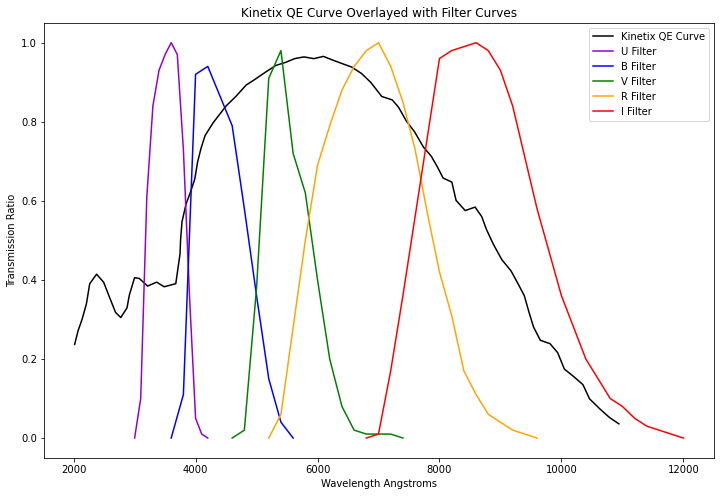

In [7]:
plt.figure(figsize = (12,8))
plt.plot(QE_curve[:,0], QE_curve[:,1], color = 'k', label = detector_name + " QE Curve")
plt.plot(filter_data[0][:,0], filter_data[0][:,1], color = 'darkviolet', label = "U Filter")
plt.plot(filter_data[1][:,0], filter_data[1][:,1], color = 'blue', label = "B Filter")
plt.plot(filter_data[2][:,0], filter_data[2][:,1], color = 'green', label = "V Filter")
plt.plot(filter_data[3][:,0], filter_data[3][:,1], color = 'orange', label = "R Filter")
plt.plot(filter_data[4][:,0], filter_data[4][:,1], color = 'red', label = "I Filter")
plt.xlabel("Wavelength Angstroms")
plt.ylabel("Transmission Ratio")
title = detector_name +  " QE Curve Overlayed with Filter Curves"
plt.legend()
plt.title(title)
plt.savefig('QE Curve Data\\' + title + ".jpg")
